In [79]:
import pandas as P
import sklearn.cluster as SC
import sklearn.decomposition as SD
import sklearn.preprocessing as SP

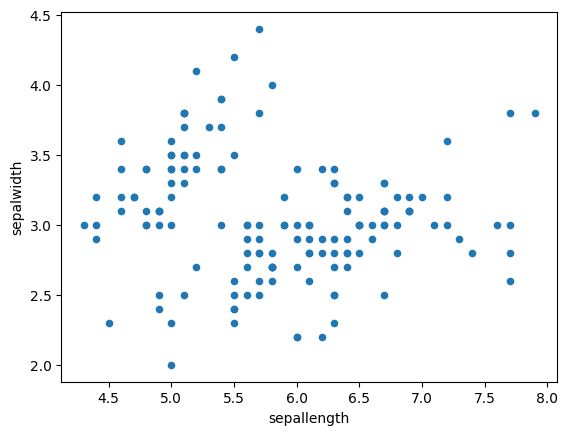

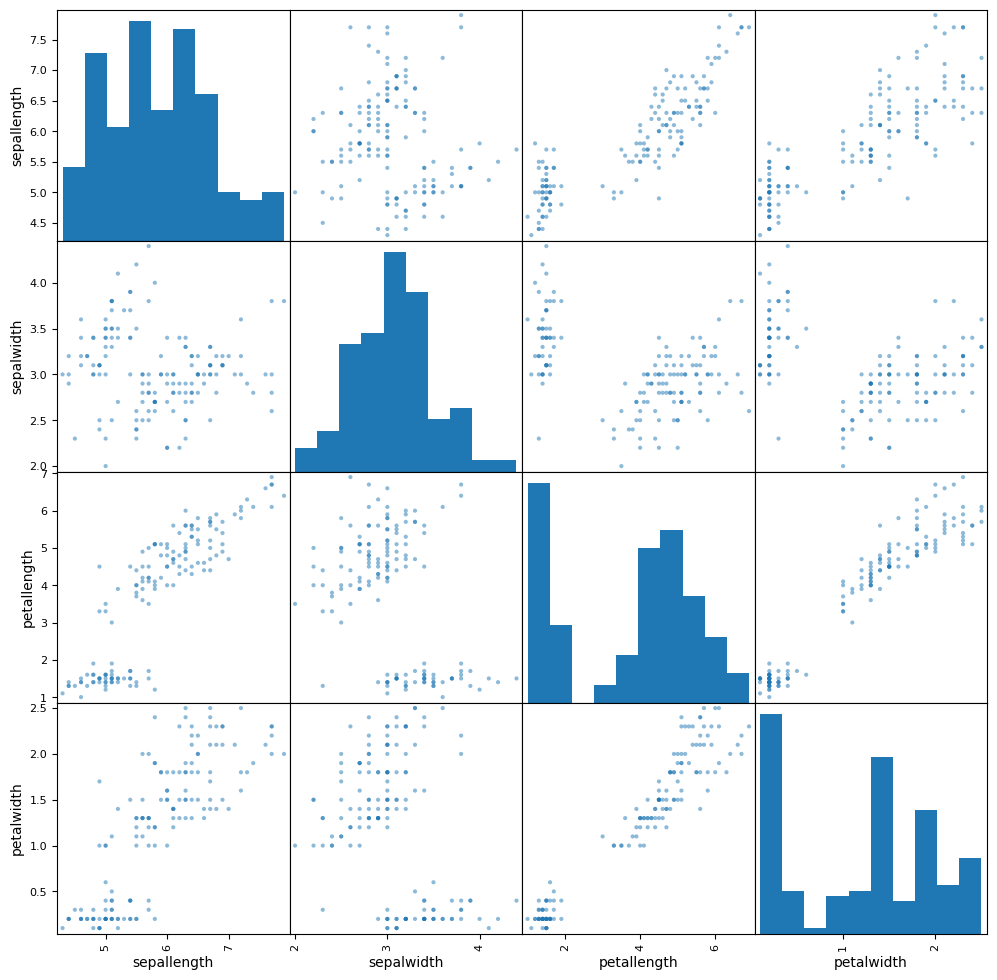

In [89]:
quantitative = ['sepallength','sepalwidth','petallength','petalwidth']
seeds = P.read_table('iris.data', sep=",",
                     header=None, names=quantitative + ['species'])
seeds.species = P.Categorical(seeds.species).rename_categories(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'))
seeds.plot.scatter('sepallength', 'sepalwidth')

dontprint = P.plotting.scatter_matrix(seeds[quantitative], figsize=(12,12))

<Axes: xlabel='0', ylabel='1'>

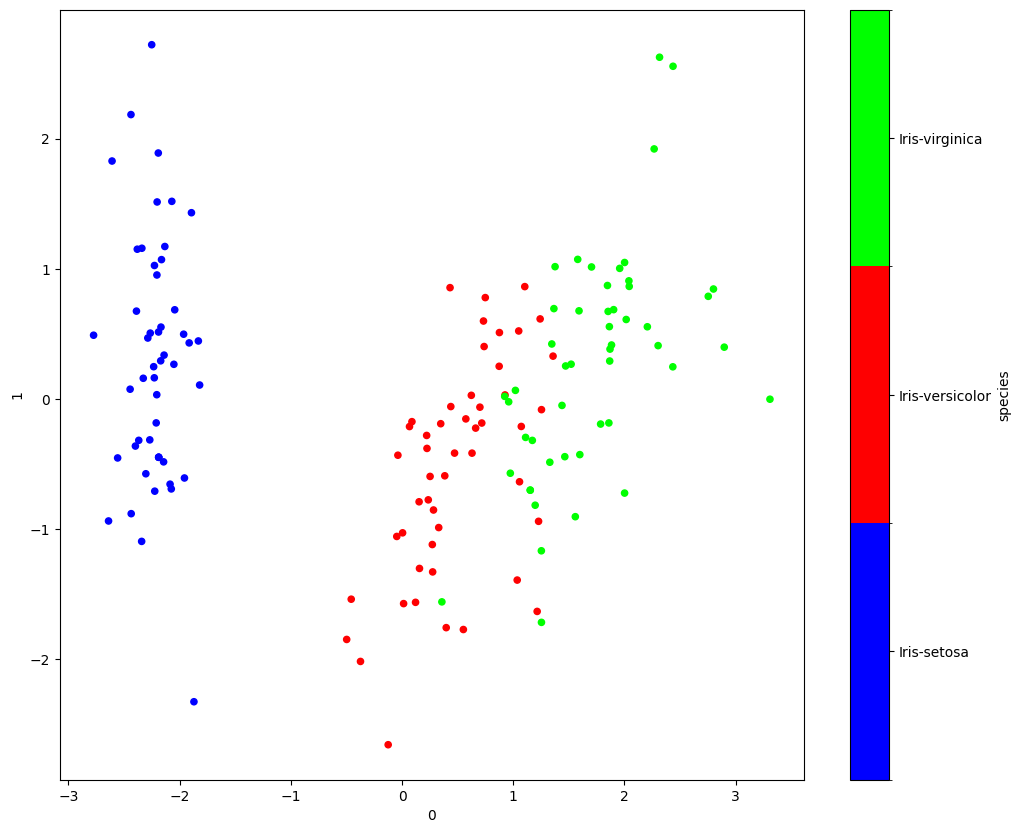

In [81]:
# select quantitative variables
df_original = seeds[quantitative]

# standardise variables to get similar variances
df_standardised = SP.StandardScaler().fit(df_original).transform(df_original)
# create PCA model
pca = SD.PCA().fit(df_standardised)
# transform data into new space
df_pca = P.DataFrame(pca.transform(df_standardised))
# add transformed data back to original data frame
seeds_extended = P.concat([seeds, df_pca], axis=1)

# visualise the first two PCA components and
# colour data points by seed variety
seeds_extended.plot.scatter(0, 1, c='species', colormap='brg', figsize=(12,10))

# observation: seed varieties are clearly separated

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Axes: xlabel='0', ylabel='1'>

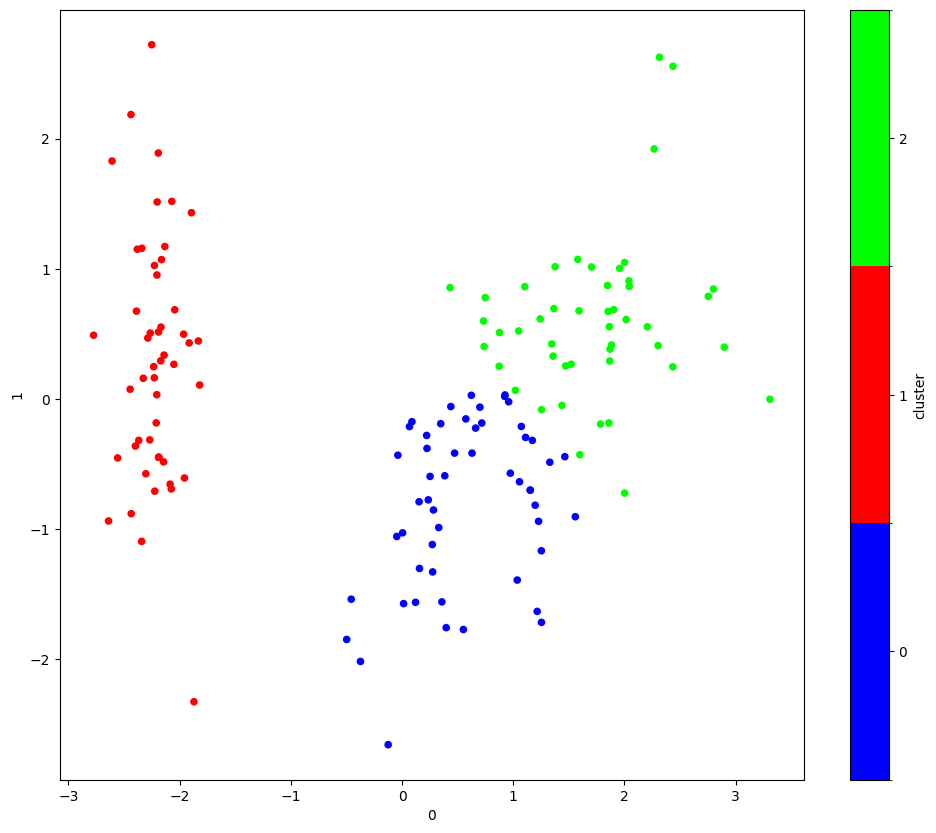

In [82]:
# create k-means model with three clusters
kmeans = SC.KMeans(n_clusters=3).fit(df_standardised)
# get memberships of data points in clusters
predictions = kmeans.predict(df_standardised)
# add memberships back to original data frame
seeds_extended['cluster'] = P.Categorical(predictions)

# visualise the first two PCA components and
# colour data points by cluster membership
seeds_extended.plot.scatter(0,1, c='cluster', colormap='brg', figsize=(12,10))

In [83]:
P.crosstab(seeds_extended['species'], seeds_extended['cluster'])

cluster,0,1,2
species,,,
Iris-setosa,0,50,0
Iris-versicolor,39,0,11
Iris-virginica,14,0,36
